In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
dataset= pd.read_csv("onlinefoods.csv")
print(dataset)

     Age  Gender Marital Status Occupation  Monthly Income  \
0     20  Female         Single    Student       No Income   
1     24  Female         Single    Student  Below Rs.10000   
2     22    Male         Single    Student  Below Rs.10000   
3     22  Female         Single    Student       No Income   
4     22    Male         Single    Student  Below Rs.10000   
..   ...     ...            ...        ...             ...   
383   23  Female         Single    Student       No Income   
384   23  Female         Single    Student       No Income   
385   22  Female         Single    Student       No Income   
386   23    Male         Single    Student  Below Rs.10000   
387   23    Male         Single    Student       No Income   

    Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                Post Graduate            4   12.9766    77.5993    560001   
1                     Graduate            3   12.9770    77.5773    560009   
2                Post

In [3]:
dataset.drop(['Pin code', 'Output', 'Unamed', 'Monthly Income', 'Marital Status', 'Educational Qualifications', 'latitude', 'longitude'], inplace = True, axis = 1)
print(dataset)

     Age  Gender Occupation  Family size   Feedback
0     20  Female    Student            4   Positive
1     24  Female    Student            3   Positive
2     22    Male    Student            3  Negative 
3     22  Female    Student            6   Positive
4     22    Male    Student            4   Positive
..   ...     ...        ...          ...        ...
383   23  Female    Student            2   Positive
384   23  Female    Student            4   Positive
385   22  Female    Student            5   Positive
386   23    Male    Student            2   Positive
387   23    Male    Student            5   Positive

[388 rows x 5 columns]


In [4]:
dataset.dropna(axis = 0, inplace = True)
print(dataset.head(), dataset.shape)
print(dataset.Feedback.value_counts())

   Age  Gender Occupation  Family size   Feedback
0   20  Female    Student            4   Positive
1   24  Female    Student            3   Positive
2   22    Male    Student            3  Negative 
3   22  Female    Student            6   Positive
4   22    Male    Student            4   Positive (388, 5)
Feedback
Positive     317
Negative      71
Name: count, dtype: int64


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[20 'Female' 'Student' 4]
 [24 'Female' 'Student' 3]
 [22 'Male' 'Student' 3]
 ...
 [22 'Female' 'Student' 5]
 [23 'Male' 'Student' 2]
 [23 'Male' 'Student' 5]]


In [7]:
print(y)

['Positive' 'Positive' 'Negative ' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative '
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative '
 'Negative ' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative ' 'Positive' 'Positive' 'Negative ' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative ' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1.0 20 4]
 [1.0 0.0 0.0 ... 1.0 24 3]
 [0.0 1.0 0.0 ... 1.0 22 3]
 ...
 [1.0 0.0 0.0 ... 1.0 22 5]
 [0.0 1.0 0.0 ... 1.0 23 2]
 [0.0 1.0 0.0 ... 1.0 23 5]]


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
print(y)

[1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
print(X_train)

[[0.0 1.0 1.0 ... 0.0 30 5]
 [1.0 0.0 1.0 ... 0.0 22 4]
 [0.0 1.0 0.0 ... 1.0 22 3]
 ...
 [1.0 0.0 0.0 ... 1.0 25 3]
 [0.0 1.0 1.0 ... 0.0 29 3]
 [1.0 0.0 0.0 ... 0.0 32 5]]


In [14]:
print(y_train)

[0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 0 1 1 1 0 0]


In [15]:
print(X_test)

[[1.0 0.0 0.0 0.0 0.0 1.0 24 3]
 [1.0 0.0 0.0 0.0 1.0 0.0 25 3]
 [0.0 1.0 0.0 0.0 0.0 1.0 25 4]
 [0.0 1.0 0.0 0.0 0.0 1.0 23 1]
 [0.0 1.0 0.0 0.0 0.0 1.0 24 2]
 [1.0 0.0 1.0 0.0 0.0 0.0 22 4]
 [1.0 0.0 0.0 0.0 0.0 1.0 25 2]
 [0.0 1.0 0.0 0.0 0.0 1.0 23 3]
 [1.0 0.0 0.0 0.0 1.0 0.0 27 5]
 [1.0 0.0 0.0 0.0 0.0 1.0 25 3]
 [1.0 0.0 1.0 0.0 0.0 0.0 31 5]
 [0.0 1.0 0.0 0.0 0.0 1.0 22 4]
 [1.0 0.0 1.0 0.0 0.0 0.0 24 4]
 [0.0 1.0 1.0 0.0 0.0 0.0 25 3]
 [0.0 1.0 0.0 0.0 0.0 1.0 22 3]
 [0.0 1.0 1.0 0.0 0.0 0.0 26 3]
 [0.0 1.0 1.0 0.0 0.0 0.0 32 5]
 [0.0 1.0 0.0 0.0 0.0 1.0 22 2]
 [0.0 1.0 1.0 0.0 0.0 0.0 27 4]
 [1.0 0.0 0.0 1.0 0.0 0.0 31 5]
 [1.0 0.0 0.0 0.0 0.0 1.0 25 3]
 [0.0 1.0 0.0 0.0 1.0 0.0 30 1]
 [1.0 0.0 1.0 0.0 0.0 0.0 23 2]
 [1.0 0.0 0.0 0.0 1.0 0.0 26 5]
 [0.0 1.0 0.0 0.0 0.0 1.0 23 2]
 [0.0 1.0 0.0 0.0 0.0 1.0 21 3]
 [0.0 1.0 1.0 0.0 0.0 0.0 27 2]
 [0.0 1.0 0.0 0.0 1.0 0.0 30 6]
 [1.0 0.0 0.0 0.0 0.0 1.0 23 1]
 [1.0 0.0 1.0 0.0 0.0 0.0 27 2]
 [0.0 1.0 0.0 0.0 1.0 0.0 28 2]
 [0.0 1.

In [16]:
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[-0.87256154  0.87256154  1.52752523 ... -1.0947975   1.80878374
   1.23008424]
 [ 1.14605097 -1.14605097  1.52752523 ... -1.0947975  -0.85498329
   0.48964518]
 [-0.87256154  0.87256154 -0.65465367 ...  0.91341093 -0.85498329
  -0.25079387]
 ...
 [ 1.14605097 -1.14605097 -0.65465367 ...  0.91341093  0.14392935
  -0.25079387]
 [-0.87256154  0.87256154  1.52752523 ... -1.0947975   1.47581286
  -0.25079387]
 [ 1.14605097 -1.14605097 -0.65465367 ... -1.0947975   2.47472549
   1.23008424]]


In [19]:
print(X_test)

[[ 1.14605097 -1.14605097 -0.65465367 -0.16275769 -0.38490018  0.91341093
  -0.18904153 -0.25079387]
 [ 1.14605097 -1.14605097 -0.65465367 -0.16275769  2.59807621 -1.0947975
   0.14392935 -0.25079387]
 [-0.87256154  0.87256154 -0.65465367 -0.16275769 -0.38490018  0.91341093
   0.14392935  0.48964518]
 [-0.87256154  0.87256154 -0.65465367 -0.16275769 -0.38490018  0.91341093
  -0.52201241 -1.73167198]
 [-0.87256154  0.87256154 -0.65465367 -0.16275769 -0.38490018  0.91341093
  -0.18904153 -0.99123293]
 [ 1.14605097 -1.14605097  1.52752523 -0.16275769 -0.38490018 -1.0947975
  -0.85498329  0.48964518]
 [ 1.14605097 -1.14605097 -0.65465367 -0.16275769 -0.38490018  0.91341093
   0.14392935 -0.99123293]
 [-0.87256154  0.87256154 -0.65465367 -0.16275769 -0.38490018  0.91341093
  -0.52201241 -0.25079387]
 [ 1.14605097 -1.14605097 -0.65465367 -0.16275769  2.59807621 -1.0947975
   0.8098711   1.23008424]
 [ 1.14605097 -1.14605097 -0.65465367 -0.16275769 -0.38490018  0.91341093
   0.14392935 -0.250

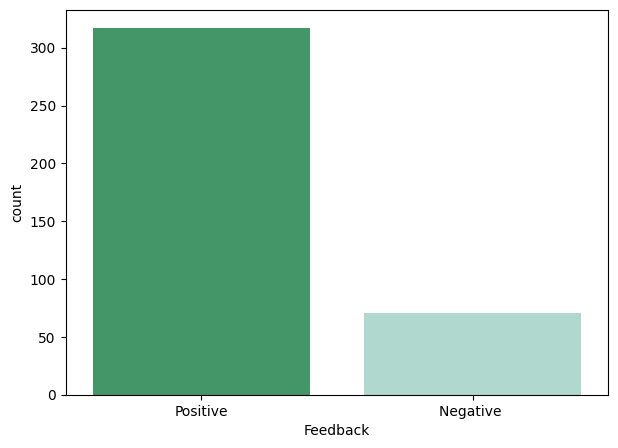

In [20]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Feedback', data=dataset, palette="BuGn_r")
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [22]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]]


In [23]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8333333333333334


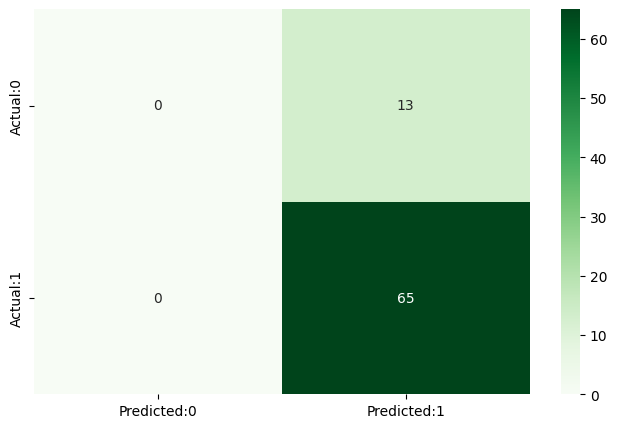

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.83      1.00      0.91        65

    accuracy                           0.83        78
   macro avg       0.42      0.50      0.45        78
weighted avg       0.69      0.83      0.76        78



c:\Users\chinm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chinm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\chinm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))
